# Random Forests

Random Forests is a collection of decision trees.

Differences between Random Forests and Decision Trees
- Random forest algorithm randomly selects observations and features to build several decision trees and then averages the results while decision trees focus on a few
- Deep decision trees might suffer from overfitting. Most of the time, random forest prevents this by creating random subsets of the features and building smaller trees using those subsets.

## Classification

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold

Datasets

In [6]:
mushrooms = pd.read_csv("../xdata/mushrooms.csv")
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [7]:
mushrooms.shape

(8124, 23)

Missing values

In [8]:
mushrooms.isna().sum(axis = 0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Unique values

In [9]:
for i in mushrooms.columns:
    print(f'{i} -> \t{mushrooms[i].unique()}')

class -> 	['p' 'e']
cap-shape -> 	['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 	['s' 'y' 'f' 'g']
cap-color -> 	['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 	['t' 'f']
odor -> 	['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 	['f' 'a']
gill-spacing -> 	['c' 'w']
gill-size -> 	['n' 'b']
gill-color -> 	['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> 	['e' 't']
stalk-root -> 	['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> 	['s' 'f' 'k' 'y']
stalk-surface-below-ring -> 	['s' 'f' 'y' 'k']
stalk-color-above-ring -> 	['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> 	['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> 	['p']
veil-color -> 	['w' 'n' 'o' 'y']
ring-number -> 	['o' 't' 'n']
ring-type -> 	['p' 'e' 'l' 'f' 'n']
spore-print-color -> 	['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> 	['s' 'n' 'a' 'v' 'y' 'c']
habitat -> 	['u' 'g' 'm' 'd' 'p' 'w' 'l']


Explore data

In [10]:
cap_colors = mushrooms['cap-color'].value_counts()
cap_colors

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [11]:
m_height = cap_colors.values.tolist() #Provides numerical values
m_height

[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]

In [12]:
cap_colors.axes #Provides row labels

[Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object', name='cap-color')]

In [13]:
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list
cap_color_labels

['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']

Visualize

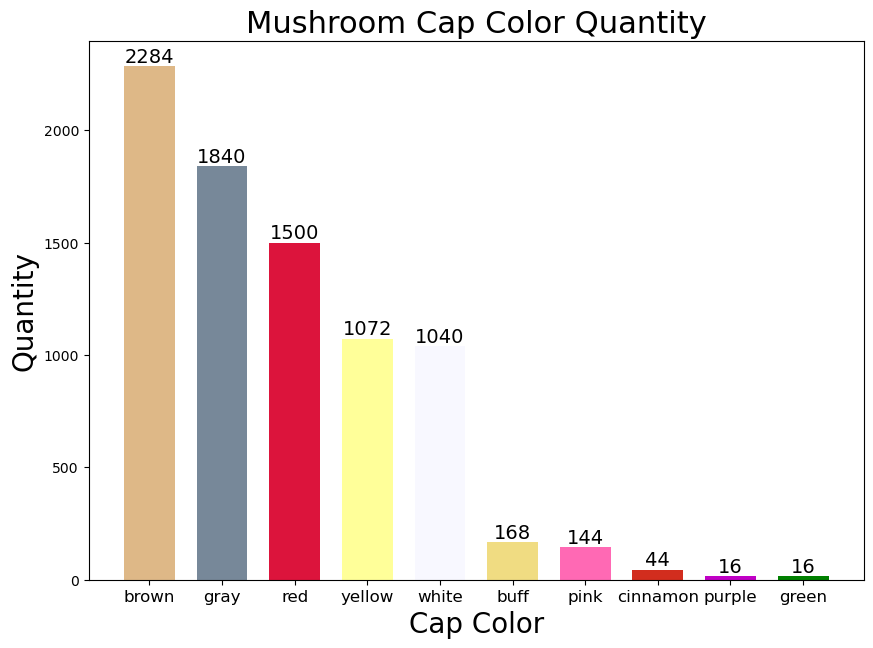

In [14]:
#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

Edible and non-edible by cap color

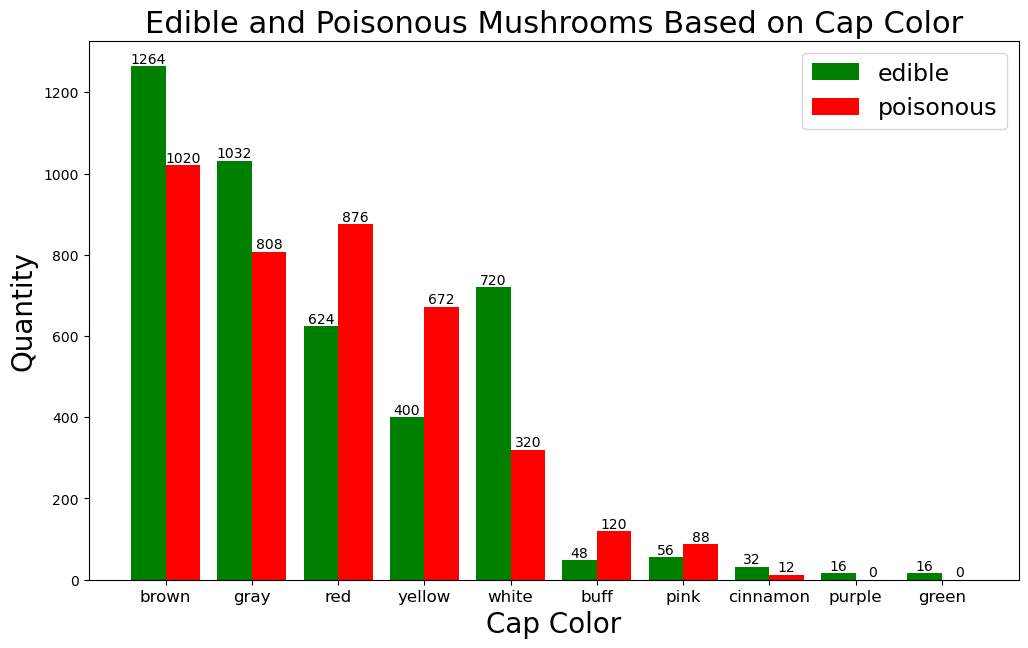

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [15]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color= 'g')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='r')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)